Test R notebook

Validate assumptions for mixed-effects model with [this](https://ademos.people.uic.edu/Chapter18.html).


- try things with python first and then verify with R?

In [5]:
library(AER)
library(dplyr)
library(purrr)
library(magrittr)
library(ggplot2)
library(effects)
library(sjPlot)
library(e1071) 
library(robustlmm)

data <- read.csv("../../data/processed/60b37265a9f60881975de69e-reshare_rates.csv")
head(data)

,user_id,consent,timeSubmitted,educationLevel,politicalAffiliation,attendsProtests,age,gender_man,gender_nonBinary,gender_woman,⋯,socialMedias_snapchat,socialMedias_tiktok,socialMedias_twitter,condition,evidence,Affirms,Denies,Neutral,Questions,rumour_proportion
,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.091052e+18,1,2021-06-03 14:35:53.721000+00:00,undergrad,centre,False,22,0,0,1,⋯,1,1,1,Treatment,High,0.1,0.0,0.00,0.25,1.0000000
2,-1.091052e+18,1,2021-06-03 14:35:53.721000+00:00,undergrad,centre,False,22,0,0,1,⋯,1,1,1,Treatment,Low,0.1,0.1,0.50,0.50,0.5000000
3,-1.363632e+18,1,2021-06-03 14:35:28.980000+00:00,highSchool,left,False,31,1,0,0,⋯,1,1,0,Treatment,High,0.2,0.2,0.25,0.50,0.5000000
4,-1.363632e+18,1,2021-06-03 14:35:28.980000+00:00,highSchool,left,False,31,1,0,0,⋯,1,1,0,Treatment,Low,0.3,0.6,0.25,0.00,0.3333333
5,-1.782715e+18,1,2021-06-03 14:34:50.118000+00:00,graduateSchool,centreRight,False,36,1,0,0,⋯,0,0,1,Control,High,0.5,0.0,0.25,0.00,1.0000000
6,-1.782715e+18,1,2021-06-03 14:34:50.118000+00:00,graduateSchool,centreRight,False,36,1,0,0,⋯,0,0,1,Control,Low,0.5,0.4,0.25,0.25,0.5555556


## H1 and H3

In [6]:
skewness(data$Affirms)

[1] 1.20244

In [9]:
skewness(log10(data$Affirms+0.02))

[1] -0.06511481

In [13]:
md.affirms.robust <- rlmer(sqrt(Affirms) ~ condition * evidence + (1 | user_id), data = data)
summary(md.affirms.robust)

Robust linear mixed model fit by DAStau 
Formula: sqrt(Affirms) ~ condition * evidence + (1 | user_id) 
   Data: data 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.72684 -0.60896 -0.06144  0.49987  2.08775 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.04110  0.2027  
 Residual             0.03396  0.1843  
Number of obs: 165, groups: user_id, 89

Fixed effects:
                                Estimate Std. Error t value
(Intercept)                     0.317543   0.041257   7.697
conditionTreatment              0.009852   0.062736   0.157
evidenceLow                    -0.054797   0.039714  -1.380
conditionTreatment:evidenceLow -0.059638   0.060888  -0.979

Correlation of Fixed Effects:
            (Intr) cndtnT evdncL
cndtnTrtmnt -0.658              
evidenceLow -0.512  0.337       
cndtnTrtm:L  0.334 -0.516 -0.652

Robustness weights for the residuals: 
 149 weights are ~= 1. The remaining 16 ones are summarized as
   Min. 1s

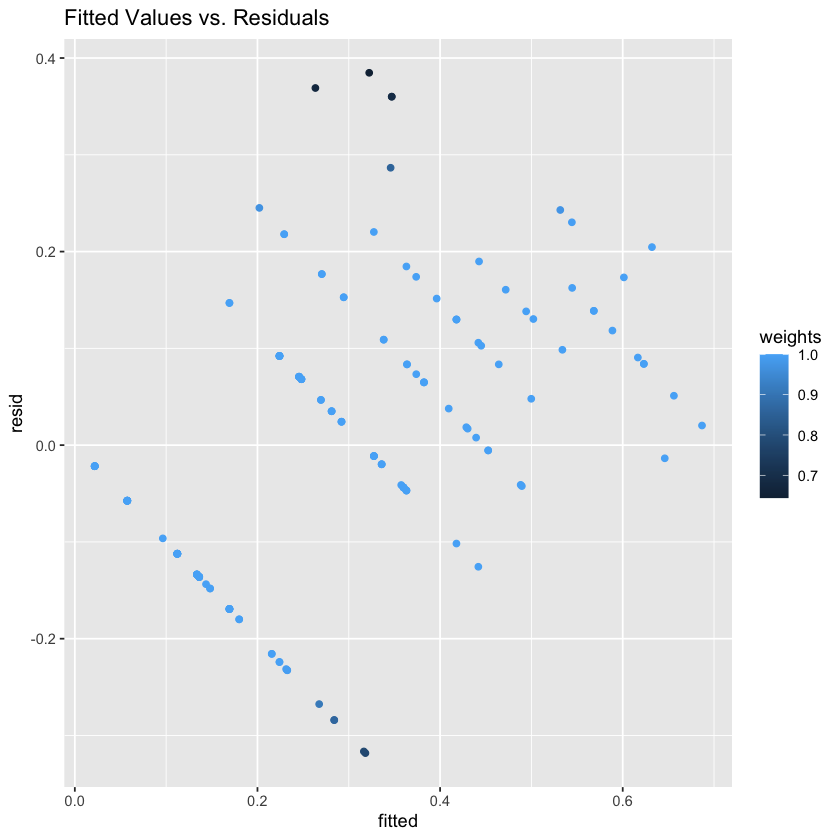

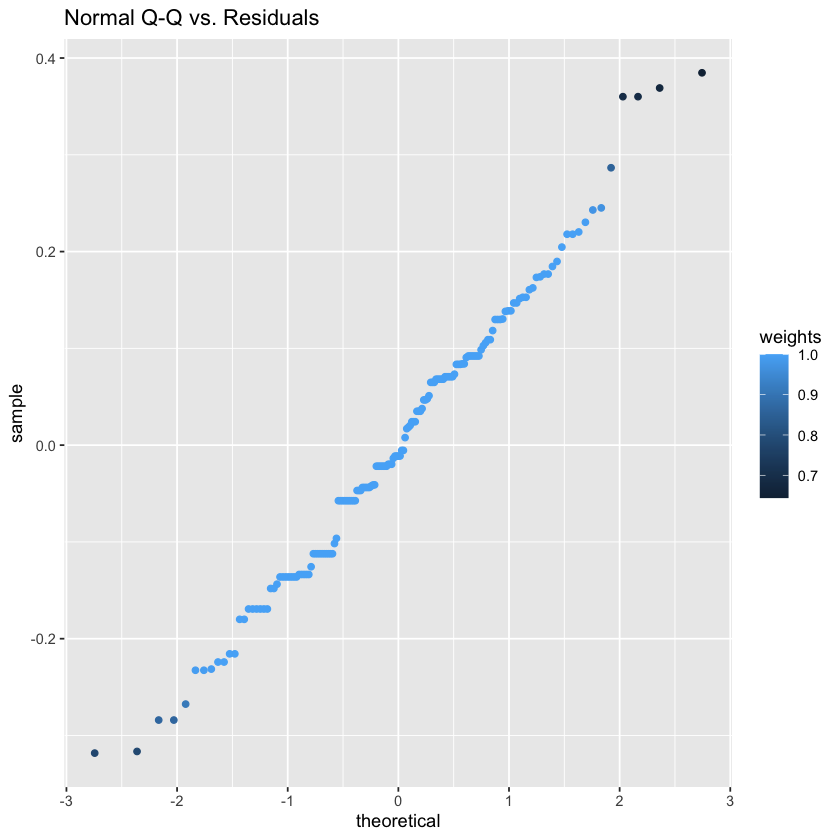

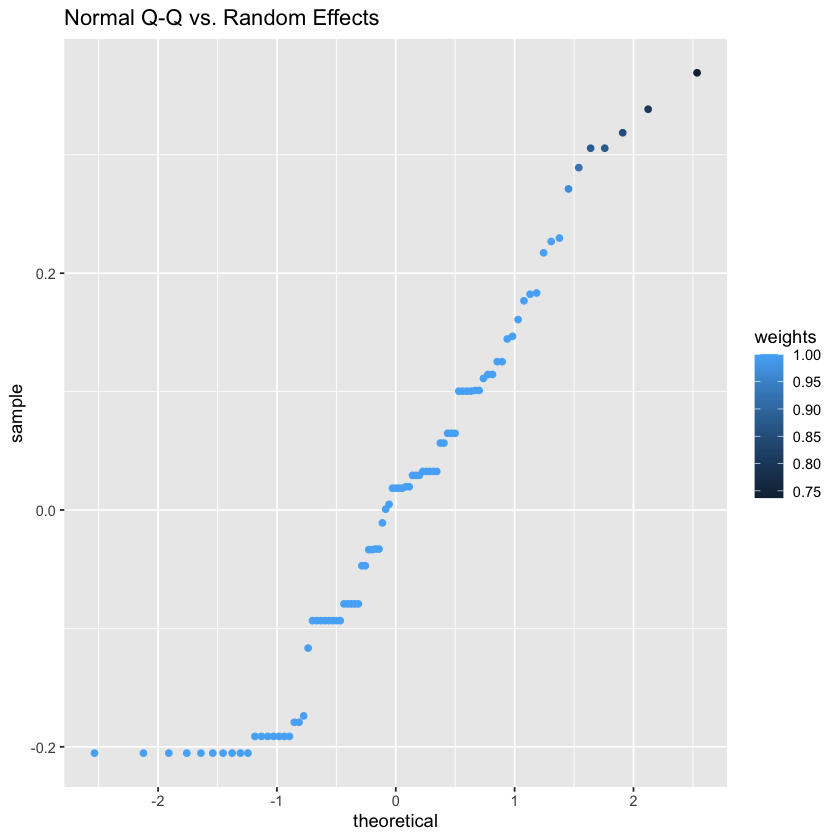

In [14]:
plot(md.affirms.robust)

**Satterthwaite approximation for p-values**

In [15]:
coefs <- data.frame(coef(summary(md.affirms.robust)))
# get Satterthwaite-approximated degrees of freedom
coefs$df.Satt <- coef(summary(md.affirms.robust))
# get approximate p-values
coefs$p.Satt <- coef(summary(md.affirms.robust))[, 2]
coefs

,Estimate,Std..Error,t.value,df.Satt,p.Satt
,<dbl>,<dbl>,<dbl>,"<dbl[,3]>",<dbl>
(Intercept),0.317542996,0.04125713,7.6966815,"0.317542996, 0.04125713, 7.6966815",0.04125713
conditionTreatment,0.009852018,0.06273551,0.1570405,"0.009852018, 0.06273551, 0.1570405",0.06273551
evidenceLow,-0.054797299,0.03971412,-1.3797938,"-0.054797299, 0.03971412, -1.3797938",0.03971412
conditionTreatment:evidenceLow,-0.059637814,0.06088787,-0.9794696,"-0.059637814, 0.06088787, -0.9794696",0.06088787


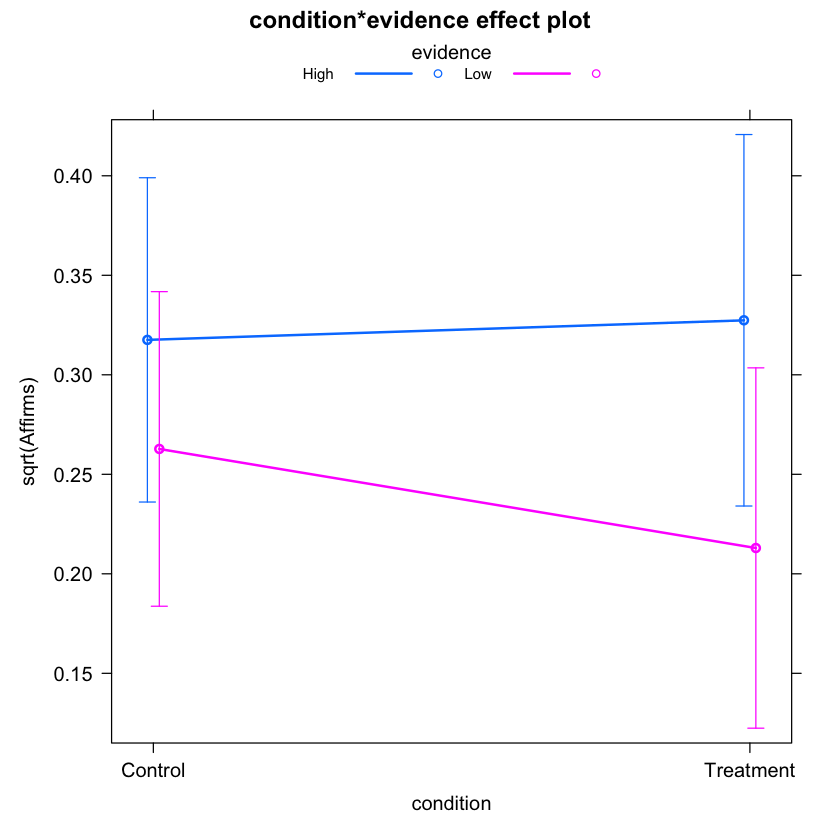

In [16]:
plot(allEffects(md.affirms.robust), multiline=TRUE, ci.style="bars")

## H2 and H4

In [17]:
skewness(data$Denies)

[1] 1.363891

In [18]:
skewness(sqrt(data$Denies))

[1] 0.06888172

In [19]:
md.denies.robust <- rlmer(sqrt(Denies) ~ condition * evidence + (1 | user_id), data = data)
summary(md.denies.robust)

boundary (singular) fit: see ?isSingular



Robust linear mixed model fit by DAStau 
Formula: sqrt(Denies) ~ condition * evidence + (1 | user_id) 
   Data: data 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.46113 -0.72723 -0.00211  0.69249  2.85248 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.00000  0.0000  
 Residual             0.04961  0.2227  
Number of obs: 165, groups: user_id, 89

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.16198    0.03406   4.756
conditionTreatment              0.03932    0.05191   0.757
evidenceLow                     0.31415    0.04717   6.660
conditionTreatment:evidenceLow  0.03274    0.07191   0.455

Correlation of Fixed Effects:
            (Intr) cndtnT evdncL
cndtnTrtmnt -0.656              
evidenceLow -0.722  0.474       
cndtnTrtm:L  0.474 -0.722 -0.656

Robustness weights for the residuals: 
 142 weights are ~= 1. The remaining 23 ones are summarized as
   Min. 1st Qu. 

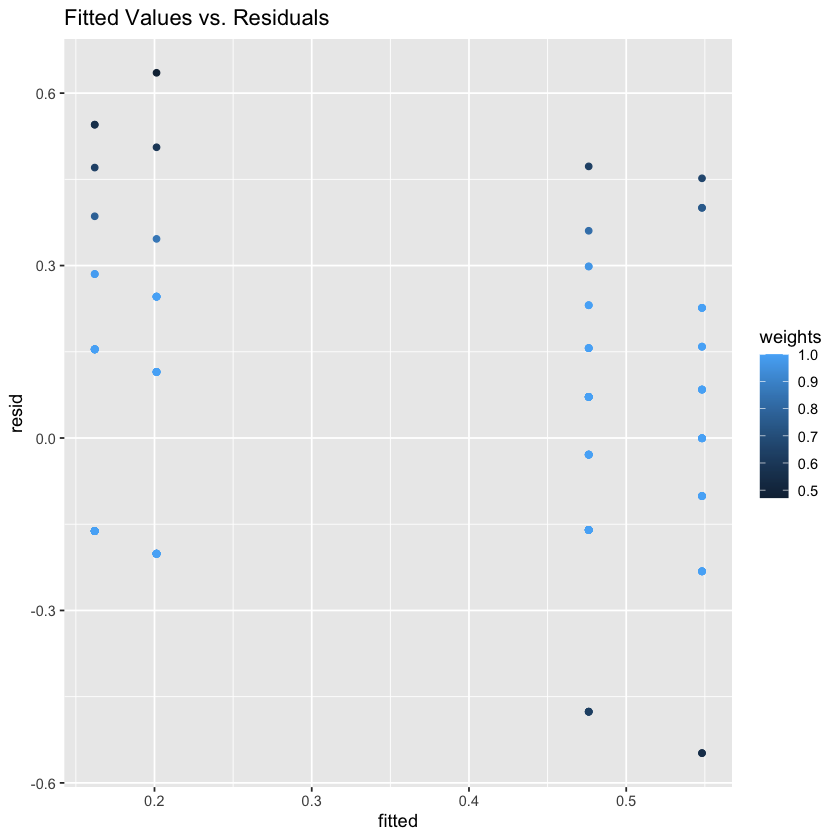

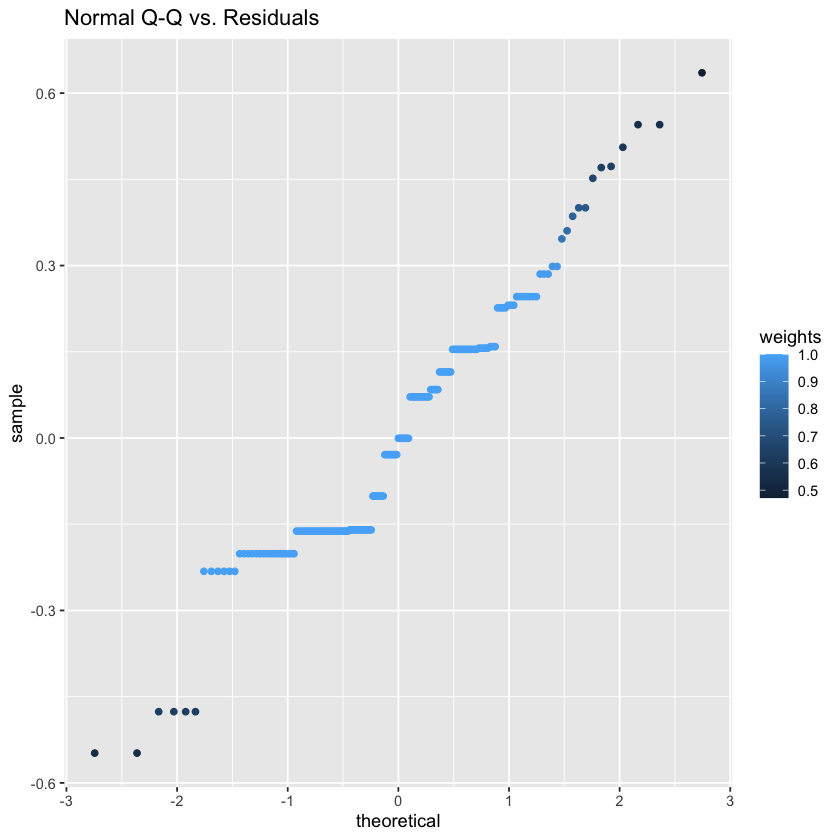

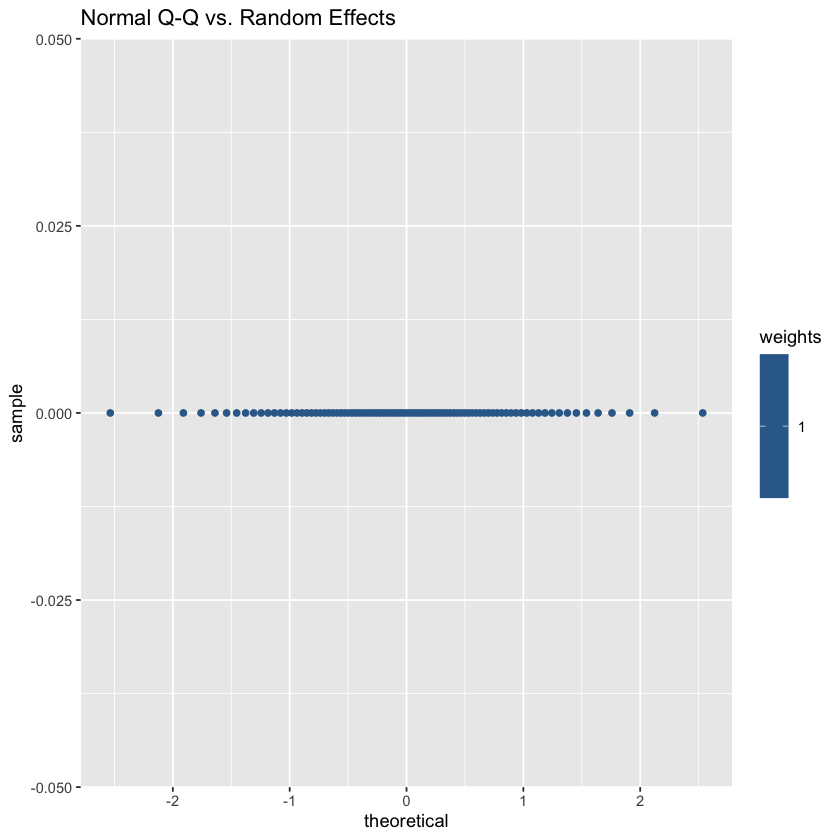

In [20]:
plot(md.denies.robust)

**Satterthwaite approximation for p-values**

In [21]:
coefs <- data.frame(coef(summary(md.denies.robust)))
# get Satterthwaite-approximated degrees of freedom
coefs$df.Satt <- coef(summary(md.denies.robust))
# get approximate p-values
coefs$p.Satt <- coef(summary(md.denies.robust))[, 2]
coefs

,Estimate,Std..Error,t.value,df.Satt,p.Satt
,<dbl>,<dbl>,<dbl>,"<dbl[,3]>",<dbl>
(Intercept),0.16198261,0.03405536,4.7564504,"0.16198261, 0.03405536, 4.7564504",0.03405536
conditionTreatment,0.03931663,0.05191101,0.7573852,"0.03931663, 0.05191101, 0.7573852",0.05191101
evidenceLow,0.31415358,0.04716842,6.6602526,"0.31415358, 0.04716842, 6.6602526",0.04716842
conditionTreatment:evidenceLow,0.03274020,0.07190531,0.4553238,"0.03274020, 0.07190531, 0.4553238",0.07190531


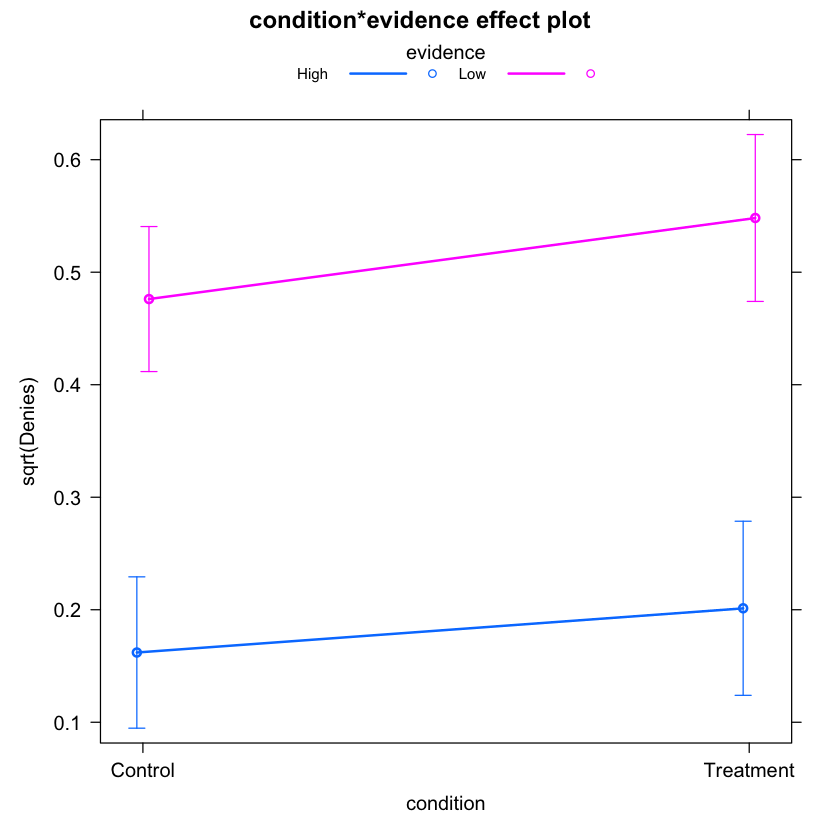

In [22]:
library(effects)
plot(allEffects(md.denies.robust), multiline=TRUE, ci.style="bars")